(EAP)=
# <span style="color:#F72585"><center>Interpretación de la Media Posterior</center></span>


En esta lección vamos a observar en algunos modelos simples, como interpretar la media o esperanza posterior (EAP). Vamos a verificar que la EAP combina la media a priori con la media proveniente de la verosimilitud. Adicionalmente introducimos el  modelo Poisson-Gamma.

## <span style="color:#4361EE">La distribución de Poisson</span>


La distribución de Poisson es el equivalente discreto de la distribución normal. Esta distribución se usa en situaciones de conteo asociadas a la ocurrencia de un evento en unidades del espacio o del tiempo. 

La distribución tiene un parámetro real positivo, usualmente denotado por $\lambda$. Este parámetro puede interpretarse como la rata de ocurrencia del evento contabilizado por unidad de espacio o tiempo. Si $N$ es una variable aleatoria con distribución Poisson, su función de probabilidad de masa (fpm) está dada por

$$P(N=n|\lambda) = Poisson(n;\lambda) = \frac{\lambda^n}{n!}e^{-\lambda n},\hspace{5mm} n=0,1,2,\ldots$$

La siguiente figura muestra la función de probabilidad de la distribución Poisson, para diferentes valores del parámetro.

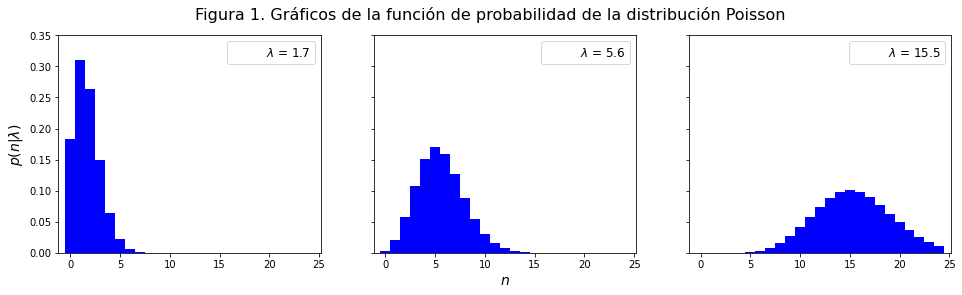

In [1]:
# gráficos de la distribución Poisson
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

lambda_params = [1.7, 5.6, 15.5 ]

x = np.arange(poisson.ppf(0.01, np.min(lambda_params)),
              poisson.ppf(0.99, np.max(lambda_params)))
n_row = 1
n_col = 3
fig, ax = plt.subplots(n_row, n_col, sharex = True, sharey = True, figsize=(16,4))

for i in range(3):
    lmbda = lambda_params[i]
    y  = poisson.pmf(x, lmbda)
    ax[i].vlines(x,0,y,colors='b', lw=10)
    ax[i].set_ylim(0,0.35)
    ax[i].plot(0,0, label = "$\\lambda$ = {:3.1f}".format(lmbda), alpha=0 )
    ax[i].legend(fontsize=12)
    
ax[1].set_xlabel('$n$', fontsize = 14)
ax[0].set_ylabel('$p(n|\\lambda)$',fontsize=14)
fig.suptitle('Figura 1. Gráficos de la función de probabilidad de la distribución Poisson',fontsize=16)
plt.show()

## <span style="color:#4361EE">La distribución Gamma</span>


Esta distribución es continua y tiene soporte en los números reales positivos. Tiene dos parámetros reales positivos: un parámetro de forma $\alpha$ y un parámetro de escala $\beta$. La función de densidad de probabilidad (fdp) esta dada por

$$f(x|\lambda,\beta) = Gama(x;\alpha,\beta) = \frac{1}{\Gamma(\alpha) \beta^{\alpha}}x^{\alpha-1}e^{-x/\beta}, \hspace{3mm} \alpha,\beta,x >0.$$

La figura 2 muestra el gráfico de la función de densidad de la distribución Gamma para diferentes valores de los parámetros.

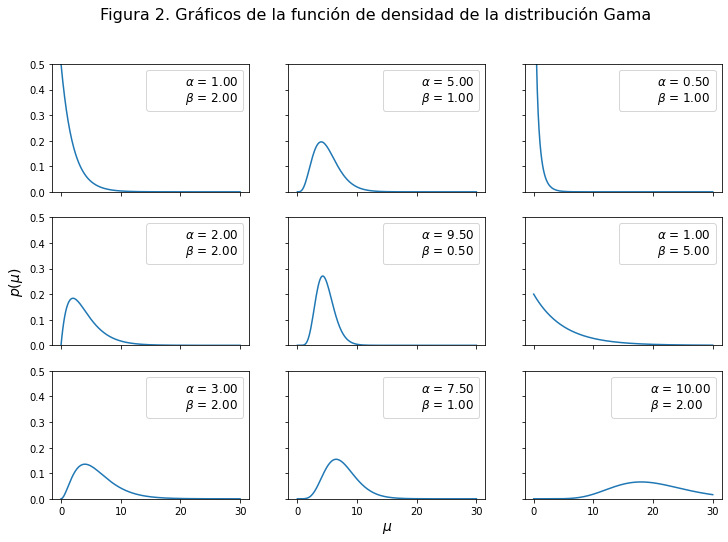

In [2]:
# gráficos de la distribución Gamma
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

alpha_params = [1.0, 2.0, 3.0, 5.0, 9.5, 7.5, 0.5, 1.0, 10.0]
beta_params  = [2.0, 2.0, 2.0, 1.0, 0.5, 1.0, 1.0, 5.0, 2.0]


idx = np.arange(9)

row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
x = np.linspace(0,30,200)
              
fig, ax = plt.subplots(3, 3,sharex = True, sharey = True, figsize=(12,8))
for i in idx:
    alpha = alpha_params[i]
    beta  = beta_params[i]
    y = gamma.pdf(x, alpha, loc=0, scale=beta)
    ax[col[i],row[i]].set_ylim(0,0.5)
    ax[col[i],row[i]].plot(x,y)
    ax[col[i],row[i]].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, beta), alpha=0)
    ax[col[i],row[i]].legend(fontsize=12)
ax[2,1].set_xlabel('$\\mu$', fontsize=14)
ax[1,0].set_ylabel('$p(\\mu)$', fontsize=14)
fig.suptitle('Figura 2. Gráficos de la función de densidad de la distribución Gama',fontsize=16)
plt.show()
    

## <span style="color:#4361EE">El modelo Pisson-Gamma</span>


Por facilidad, en esta sección usaremos la reparametrización $\beta = 1/\nu$, para la distribución Gamma. En consecuencia $\nu$ es un parámetro de precisión.  Note que entonces

$$f(x|\lambda,\nu) = Gama(x;\alpha,\nu) = \frac{\nu^{\alpha}}{\Gamma(\alpha) }x^{\alpha-1}e^{-\nu x}, \hspace{3mm} \alpha,\nu,x >0.$$

Dado que el parámetro de la distribución Poisson es un número real positivo, una posible distribución a priori que puede generar tal parámetro es la distribución Gamma. En tal caso, la distribución posterior también es una distribución Gamma, como se muestra a continuación. Sean $\mathbf{y}= \{y_1, \ldots,y_n\}$ observaciones provenientes de la distribución $Poisson(\lambda)$. Entonces la verosimilitud $p( \mathbf{y}|\lambda)$ está dada por

$$p(\mathbf{y}|\lambda) = \prod_{i=1}^{n} Poisson(y_i;\lambda) \propto \lambda^{\sum_{i=1}^n y_i} e^{-n\lambda}$$
 
Por lo tanto la posterior tiene la forma

$$p(\lambda|\boldsymbol{y}) \propto  \left[\lambda^{\sum_{i=1}^n y_i} e^{-n\lambda}\right] \lambda^{\alpha-1}e^{-\nu \lambda}  = \lambda^{\sum_{i=1}^n y_i +\alpha -1 } e^{-(n+\nu)\lambda},$$

Por lo tanto, la posterior es Gamma:
$$p(\lambda|\boldsymbol{y}) = Gamma\left(\displaystyle\sum_{i=1}^n y_i+\alpha,n+\nu\right)$$


## <span style="color:#4361EE">Media Posterior</span>


La esperanza de la distribución $Gamma(\alpha,\nu)$, es decir, en la segunda parametrización, es dada por $\alpha/\nu$. La media de la observaciones es $\bar{\mathbf{y}} = \tfrac{1}{n}\sum_i y_i$. Este es la estimación máximo verosímil de $\lambda$, es decir, es el valor que maximiza la verosimilitud. En otras palabras, la estimación máximo verosímil de $\lambda $  es dada por $\tilde{\lambda} = \bar{\mathbf{y}}$. Por favor verificar.

Por otro lado, la media posterior es dada por

$$EAP(\lambda) = E[\lambda|\mathbf{y}]=\hat{\lambda} = \frac{\sum_{i=1}^n y_i + \alpha}{n + \nu} = \frac{n}{n+\nu} \bar{\mathbf{y}} + \frac{\nu}{n+\nu} \left[ \frac{\alpha}{\nu}\right].$$

Si definimos $\kappa = \tfrac{\nu}{n+\nu}$, se puede escribir que

$$EAP(\lambda) = E[\lambda|\mathbf{y}]=\hat{\lambda} =  \kappa \left[ \frac{\alpha}{\nu}\right] + (1-\kappa) \bar{\mathbf{y}} +.$$

Que dice que la esperanza posterior es un promedio ponderado entre la media a priori y la estimación máximo verosímil de $\lambda$.


::{admoninion}:: Note que
:class: tip
1. $\hat{\lambda} \to \bar{\mathbf{y}}$ cuando $\nu \to 0$, ($\kappa \to 0$).
2. $\hat{\lambda} \to \frac{\alpha}{\nu}$ cuando $\nu \to \infty$ , ($\kappa \to 1$).
::


## <span style="color:#4361EE">Varianza Posterior</span>


La varianza de la distribución $Gamma(\alpha,\nu)$, es decir utilizando el parámetro de precisión, es dada por $\alpha/\nu^2$ y la varianza posterior es dada por

$$Var[\lambda|\mathbf{y}] = \frac{\sum_{i=1}^n y_i + \alpha}{(n+\nu)^2}.$$


## <span style="color:#4361EE">Ejercicio Modelo Binomial-Beta</span>


Encuentre relaciones similares en el modelo Binomial - Beta.


### <span style="color:#4CC9F0">Solución</span>
Consideramos la a priori $\text{Beta}(a,b)$ para $\mu$. Por lo tanto

$$
P(\mu|a,b) \propto \mu^{a-1}(1-\mu)^{b-1}.
$$

La media a priori es dada por $\nu = \tfrac{a}{a+b}$. Sea $M=a+b$. Puede verificarse que $M$ es un parámetro de precisión. Entonces tenemos que $a =\nu M $ y $b= (1-\nu)M$. Así, la a priori para $\mu$ es dada por

$$
P(\mu|\nu,M) \propto \mu^{\nu M}(1-\mu)^{(1-\nu)M}.
$$


La verosimilitud de las observaciones es tal que

$$
P(Y=\omega|\mu,n) \propto \mu^{\omega}(1-\mu)^{n-\omega}
$$

Luego la estimación máximo verosímil de $\mu$ es $\tfrac{\omega}{n}$

La densidad posterior es dada por

$$
p(\mu|\omega)\propto \mu^{\omega+\nu M -1}(1-\mu)^{n-\omega + (1-\nu)M-1},
$$

es decir que $p(\mu|\omega) = \text{Beta}(\omega+\nu M, n-\omega + (1-\nu)M)$. Entonces, la esperanza a posterior (EAP) de $\mu$ es dada por

$$
EAP(\mu) = \frac{n[\tfrac{\omega}{n}]+ M[\nu]}{n+M}
$$
. 
Si definimos $\kappa = \tfrac{M}{n+M}$, se obtiene que

$$
EAP(\mu) = \kappa [\nu] + (1-\kappa) [\tfrac{\omega}{n}],
$$

que de nuevo dice que la esperanza posterior es un promedio ponderado entre la media a priori y la estimación máximo verosímil de $\mu$.

Adicionalmente, la varianza posterior está dada por
$$\begin{align*}
var(\mu|\omega)&=\frac{(\omega+\nu M)(n-\omega + (1-\nu)M)}{(\omega+\nu M+n-\omega + (1-\nu)M)^2(\omega+\nu M+ n-\omega + (1-\nu)M+1)}\\
               \\
               &=\frac{\left(ω+νM\right)\left(n-ω+\left(1-ν\right)M\right)}{\left(n+M\right)^2\left(n+M+1\right)}
               \end{align*}$$





## <span style="color:#4361EE">Modelo Gaussiano-Gaussiano</span>


Supongamos que $\mathbf{y} =(y_1,\ldots,y_n)'$ es una muestra de una población normal $\mathcal{N}(\theta,\sigma^2)$, en donde $\sigma^2$ es conocida. Entonces, el parámetro de interés es $\theta$, el cual es un número real. 

Es *natural* entonces asumir una distribución a priori normal para $\theta$, digamos $\mathcal{N} (\mu_0,\tau)$. En donde vamos a asumir que $\mu_0$ y $\tau$ son hiperparámetros dados de antemano.



En este caso tenemos que

$$
\begin{align*}
 \text{A priori: } &p(\theta) = \mathcal{N}(\mu_0,\tau^2)\\
 \text{Verosimilitud: }  &p(\bar{\mathbf{y}}|\theta) = \mathcal{N}(\theta,\sigma^2/n)\\
 \text{Posterior: } &p(\theta|\bar{\mathbf{y}}) = \mathcal{N}\left(\frac{\sigma^2 \mu_0 + n\tau^2 \bar{\mathbf{y}}}{\sigma^2 + n\tau^2},\frac{\sigma^2\tau^2}{\sigma^2+ n\tau^2}  \right)\\
\end{align*}
$$


### <span style="color:#4CC9F0">Ejercicio</span>


Verifique completamente las ecuaciones anteriores.

Si definimos $\kappa= \tfrac{\sigma^2}{\sigma^2+n\tau^2}$ 

$$
\begin{align*}
E(\theta|\bar{\mathbf{y}}) &= \kappa\mu_0 + (1-\kappa)\bar{\mathbf{y}}\\
Var(\theta|\bar{\mathbf{y}})& =(1-\kappa)\sigma^2,
\end{align*}
$$

De nuevo, la EAP es un promedio ponderado entre la media a priori y la estimación máximo verosímil del parámetro.

## <span style="color:#4361EE">Discusión</span>


Reflexione sobre las siguientes afirmaciones. Si nos basamos en los resultados de esta lección podemos afirmar que

1. En cada caso, la esperanza a posterior es un estimador sesgado que mezcla la información a priori (a partir de la media a priori) y la información que proviene de los datos (estimación máximo verosímil).
2. La varianza de la EAP es en general menor que la varianza del estimador máximo verosímil.

## <span style="color:#4361EE">Tarea</span>


1. Consiga unos datos, para cada uno de los modelos Poisson , Binomial y Normal. Consulte cualquier libro de inferencia estadística. Proponga distribuciones a priori para los parámetros. En el caso normal, asuma que $\sigma^2$ es conocida.
2. Calcule las estimaciones Bayesianas puntuales y de intervalo en cada caso. Presente sus resultados en una tabla.
3. Escriba en cada caso la EAP como promedio ponderado de la media a priori y la estimación máximo verosímil en cada caso.
4. Haga las gráficas que considere conveniente.
5. Repita los puntos 1 a 4, con datos generados por simulación.